# XGBoost Using Nonimputed Dataset

importing Jupyter notebook from Self_Written_Functions_Sheet.ipynb
importing Jupyter notebook from ML_HousingPrice_EDA_and_Basic_Imputation.ipynb
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 

0.0
0.0
8
259.38169642857144
203.5
0    120.0
1    180.0
dtype: float64
[0, 1]
150.0
259.71651785714283
203.5
0    120.0
1    180.0
dtype: float64
240.234375
206.5
0     50.0
1     72.0
2    100.0
3    106.0
4    186.0
5    200.0
dtype: float64


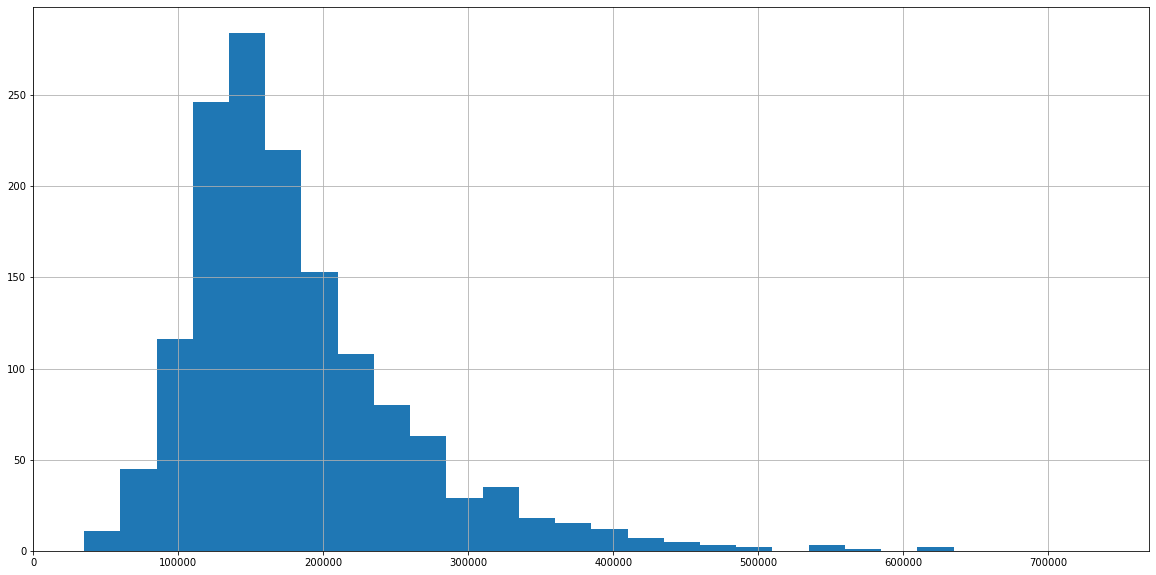

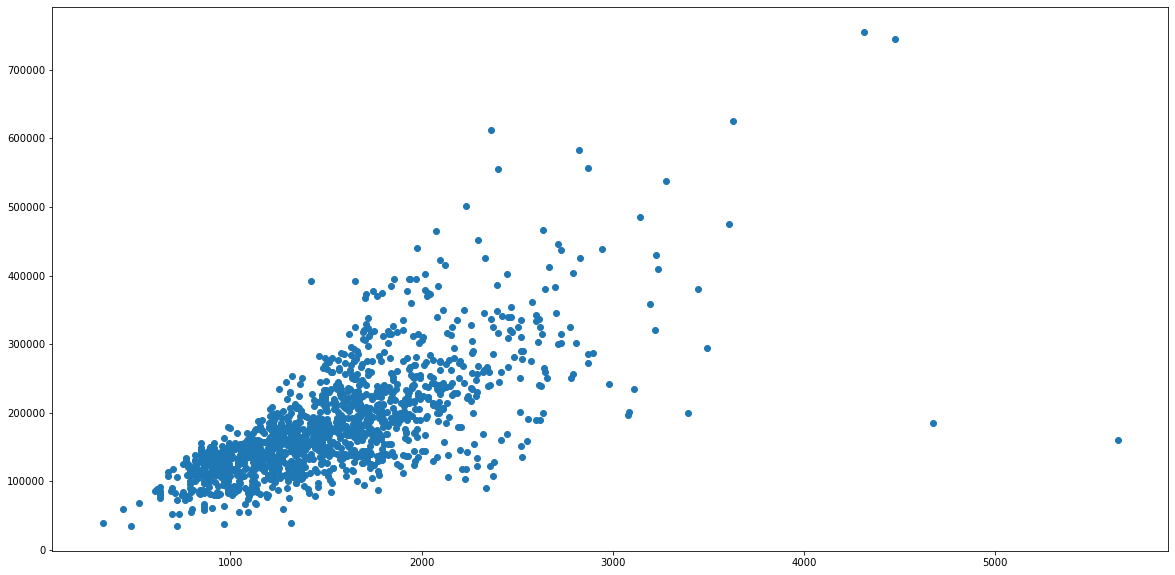

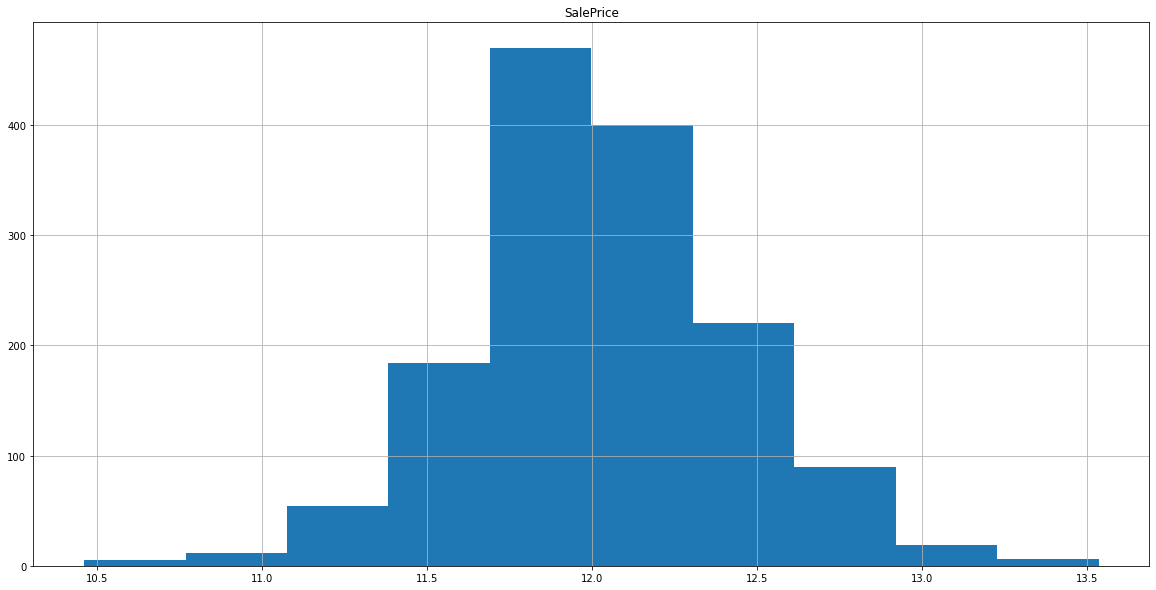

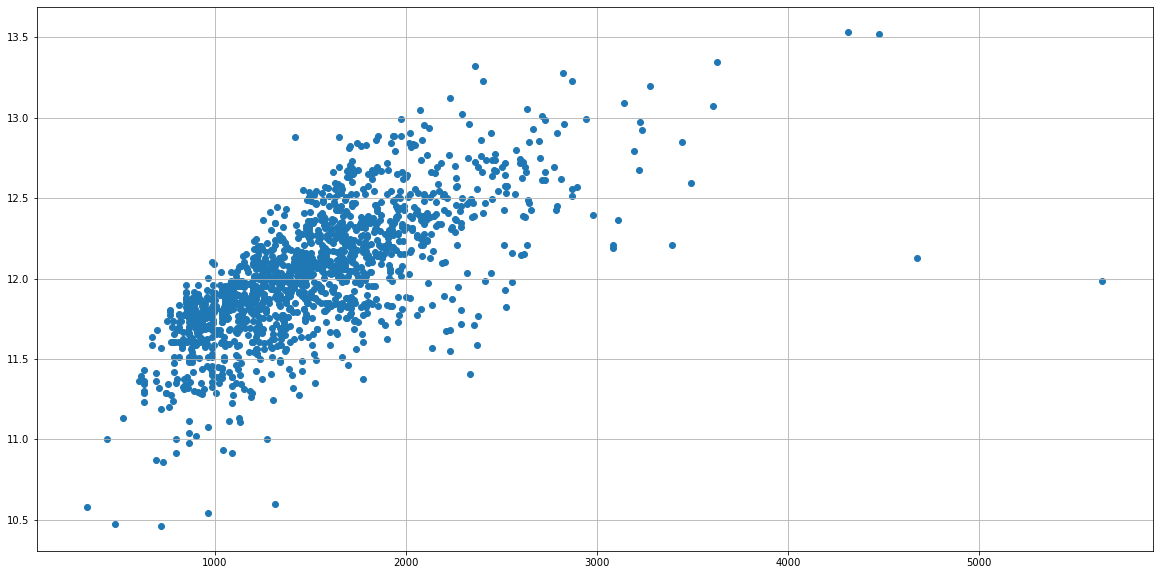

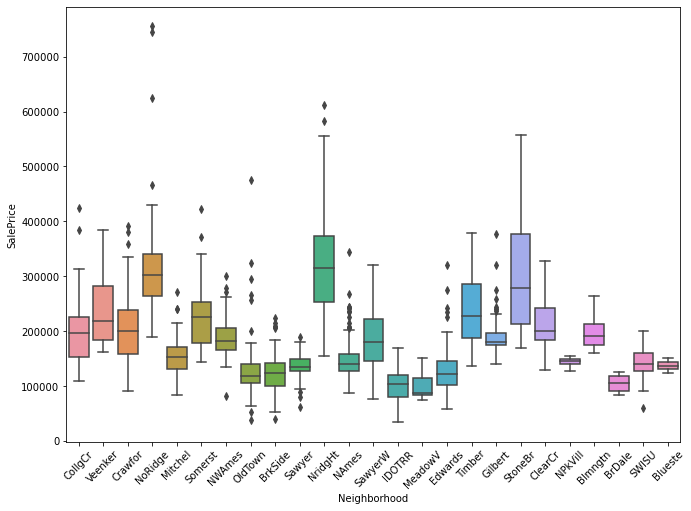

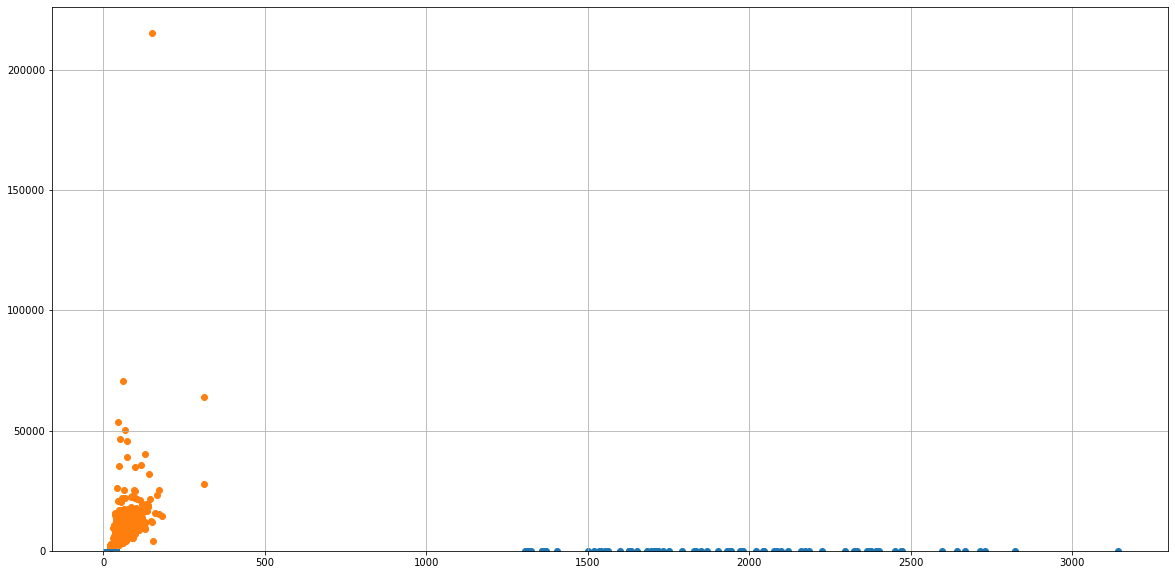

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.feature_selection import chi2, f_regression, f_classif, mutual_info_classif, mutual_info_regression 
from sklearn.feature_selection import SelectKBest, SelectFromModel, VarianceThreshold
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model as lm
from sklearn import neighbors
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn import model_selection as ms
from sklearn.model_selection import cross_val_score, cross_val_predict

sklearn.set_config(print_changed_only=False)

import xgboost as xgbst

from matplotlib import pyplot as plt

import import_ipynb
from Self_Written_Functions_Sheet import col_obj_list, nan_col_list, cols_nan_unique, nan_col_obj_list_fillna, fill_masvnrtype
from Self_Written_Functions_Sheet import rmse

from ML_HousingPrice_EDA_and_Basic_Imputation import hp, hp_saleprice, hp_logsaleprice, hp_nooutliers

from ML_HousingPrice_LotFrontage_Imputation_DataSetManagement import hp_nonimpute

import datetime
import time

In [2]:
hp_nonimpute = pd.read_csv('../hp_tree_fullyimputed.csv')

hp_nonimpute

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GarageYrModified
0,60,6,65.0,8450,2,0,1,1,1,1,1,6,3,3,1,4,7,5,2003,2003,2,2,15,15,2,196.0,2,3,3,2,3,4,1,706,6,0,150,856,2,1,1,1,856,854,0,1710,1,0,2,1,3,1,2,8,1,0,0,2,2003.0,2,2,548,3,3,1,0,61,0,0,0,0,0,0,0,0,2,2008,1,1,2003
1,20,6,80.0,9600,2,0,1,1,1,4,1,25,2,3,1,1,6,8,1976,1976,2,2,9,9,4,0.0,3,3,2,2,3,1,2,978,6,0,284,1262,2,1,1,1,1262,0,0,1262,0,1,2,0,3,1,3,6,1,1,3,2,1976.0,2,2,460,3,3,1,298,0,0,0,0,0,0,0,0,0,5,2007,1,1,1976
2,60,6,68.0,11250,2,0,2,1,1,1,1,6,3,3,1,4,7,5,2001,2002,2,2,15,15,2,162.0,2,3,3,2,3,3,1,486,6,0,434,920,2,1,1,1,920,866,0,1786,1,0,2,1,3,1,2,6,1,1,3,2,2001.0,2,2,608,3,3,1,0,42,0,0,0,0,0,0,0,0,9,2008,1,1,2001
3,70,6,60.0,9550,2,0,2,1,1,2,1,7,3,3,1,4,7,5,1915,1970,2,2,16,17,4,0.0,3,3,1,3,2,4,2,216,6,0,540,756,2,2,1,1,961,756,0,1717,1,0,1,0,3,1,2,7,1,1,2,6,1998.0,3,3,642,3,3,1,0,35,272,0,0,0,0,0,0,0,2,2006,1,2,1915
4,60,6,84.0,14260,2,0,2,1,1,4,1,14,3,3,1,4,8,5,2000,2000,2,2,15,15,2,350.0,2,3,3,2,3,2,1,655,6,0,490,1145,2,1,1,1,1145,1053,0,2198,1,0,2,1,4,1,2,9,1,1,3,2,2000.0,2,3,836,3,3,1,192,84,0,0,0,0,0,0,0,0,12,2008,1,1,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,6,62.0,7917,2,0,1,1,1,1,1,9,3,3,1,4,6,5,1999,2000,2,2,15,15,4,0.0,3,3,3,2,3,4,6,0,6,0,953,953,2,1,1,1,953,694,0,1647,0,0,2,1,3,1,3,7,1,1,3,2,1999.0,2,2,460,3,3,1,0,40,0,0,0,0,0,0,0,0,8,2007,1,1,1999
1456,20,6,85.0,13175,2,0,1,1,1,1,1,17,3,3,1,1,6,6,1978,1988,2,2,11,11,5,119.0,3,3,2,2,3,4,2,790,4,163,589,1542,2,3,1,1,2073,0,0,2073,1,0,2,0,3,1,3,7,2,2,3,2,1978.0,3,2,500,3,3,1,349,0,0,0,0,0,0,2,0,0,2,2010,1,1,1978
1457,70,6,66.0,9042,2,0,1,1,1,1,1,7,3,3,1,4,7,9,1941,2006,2,2,6,6,4,0.0,1,2,5,3,2,4,1,275,6,0,877,1152,2,1,1,1,1188,1152,0,2340,0,0,2,0,4,1,2,9,1,2,2,2,1941.0,2,1,252,3,3,1,0,60,0,0,0,0,0,1,4,2500,5,2010,1,1,1941
1458,20,6,68.0,9717,2,0,1,1,1,1,1,13,3,3,1,1,5,6,1950,1996,4,2,9,9,4,0.0,3,3,2,3,3,3,1,49,4,1029,0,1078,2,2,1,2,1078,0,0,1078,1,0,1,0,2,1,2,5,1,0,0,2,1950.0,3,1,240,3,3,1,366,0,112,0,0,0,0,0,0,0,4,2010,1,1,1950


In [3]:
hp_logsaleprice = pd.read_csv('../hp_logsaleprice.csv')

hp_logsaleprice

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216
...,...
1455,12.072541
1456,12.254863
1457,12.493130
1458,11.864462


## Delete the outliers in the features and labels

In [4]:
hp_tree_noOutliers = hp_nonimpute.drop([523, 825, 1298])

# hp_linear_fullyimputed_noOutliers = hp_linear_fullyimputed.drop([523, 825, 1298])

hp_logsaleprice_noOutliers = hp_logsaleprice.drop([523, 825, 1298])

# hp_linear_selected_noOutliers = hp_linear_selected.drop([523, 825, 1298])

In [5]:
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_nonimpute,
                                                   hp_logsaleprice, test_size=0.2, random_state=0)

ytrain = ytrain.values.flatten()

In [6]:
xtrain_gb_out, xtest_gb_out, ytrain_gb_out, ytest_gb_out = ms.train_test_split(hp_tree_noOutliers, 
                                                               hp_logsaleprice_noOutliers, test_size=0.2, random_state=0)

ytrain_gb_out = ytrain_gb_out.values.flatten()

# USE COMPLETELY NONIMPUTED DATASET

In [7]:
state = 0

l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []
    
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_nonimpute,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=state)

ytrain = ytrain.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

xgb = xgbst.XGBRegressor(random_state=state, eval_metric='rmse')

maxdepth = range(2, 6)
eta_ = np.linspace(0.05, 0.2, 20)
gamma_ = [0]
subsample_ = np.linspace(0.5, 1, 10)

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
              'gamma': gamma_,
              'subsample': subsample_}

gs_xgb = ms.GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb.fit(xtrain, ytrain)

l_scores.append(gs_xgb.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_xgb, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb, ytest, xtest))
best_par_list.append(gs_xgb.best_params_)

diff_rmse = np.subtract(train_rmse, test_rmse)
    
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']

best_par_df = pd.DataFrame(best_par_list)

xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

xgb_res_df

Wall time: 1min 10s


C:\Users\tdcho\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\tdcho\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\tdcho\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


,Scores,TrainRMSE,TestRMSE,DiffRMSE,eta,gamma,max_depth,subsample
0,0.958581,0.081778,0.143096,-0.061318,0.128947,0,3,0.5


In [8]:
state = 0

l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []
    
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_nonimpute,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=state)

ytrain = ytrain.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

xgb = xgbst.XGBRegressor(random_state=state, eval_metric='rmse')

maxdepth = range(2, 6)
eta_ = np.linspace(0.05, 0.2, 20)
gamma_ = [0.2]
subsample_ = np.linspace(0.4, 0.9, 10)

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
              'gamma': gamma_,
              'subsample': subsample_}

gs_xgb = ms.GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb.fit(xtrain, ytrain)

l_scores.append(gs_xgb.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_xgb, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb, ytest, xtest))
best_par_list.append(gs_xgb.best_params_)

diff_rmse = np.subtract(train_rmse, test_rmse)
    
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']

best_par_df = pd.DataFrame(best_par_list)

xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

xgb_res_df

Wall time: 4min 41s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,eta,gamma,max_depth,subsample
0,0.939519,0.09882,0.14091,-0.04209,0.160526,0.2,5,0.566667


In [9]:
state = 0

l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []
    
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_nonimpute,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=state)

ytrain = ytrain.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

xgb = xgbst.XGBRegressor(random_state=state, eval_metric='rmse')

maxdepth = range(3, 7)
eta_ = np.linspace(0.05, 0.2, 20)
gamma_ = [0.6]
subsample_ = np.linspace(0.4, 0.9, 10)

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
              'gamma': gamma_,
              'subsample': subsample_}

gs_xgb = ms.GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb.fit(xtrain, ytrain)

l_scores.append(gs_xgb.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_xgb, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb, ytest, xtest))
best_par_list.append(gs_xgb.best_params_)

diff_rmse = np.subtract(train_rmse, test_rmse)
    
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']

best_par_df = pd.DataFrame(best_par_list)

xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

xgb_res_df

Wall time: 6min 43s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,eta,gamma,max_depth,subsample
0,0.905059,0.123812,0.149567,-0.025755,0.160526,0.6,4,0.566667


In [10]:
state = 0

l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []
    
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_nonimpute,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=state)

ytrain = ytrain.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

xgb = xgbst.XGBRegressor(random_state=state, eval_metric='rmse')

maxdepth = range(3, 7)
eta_ = np.linspace(0.05, 0.2, 20)
gamma_ = [0.8]
subsample_ = np.linspace(0.4, 0.9, 12)

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
              'gamma': gamma_,
              'subsample': subsample_}

gs_xgb = ms.GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb.fit(xtrain, ytrain)

l_scores.append(gs_xgb.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_xgb, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb, ytest, xtest))
best_par_list.append(gs_xgb.best_params_)

diff_rmse = np.subtract(train_rmse, test_rmse)
    
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']

best_par_df = pd.DataFrame(best_par_list)

xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

xgb_res_df

Wall time: 8min 14s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,eta,gamma,max_depth,subsample
0,0.888994,0.133878,0.149049,-0.015171,0.128947,0.8,3,0.490909


In [11]:
state = 0

l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []
    
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_nonimpute,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=state)

ytrain = ytrain.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

xgb = xgbst.XGBRegressor(random_state=state, eval_metric='rmse')

maxdepth = range(2, 7)
eta_ = np.linspace(0.05, 0.2, 20)
gamma_ = [0.8]
subsample_ = np.linspace(0.4, 0.6, 11)

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
              'gamma': gamma_,
              'subsample': subsample_}

gs_xgb = ms.GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb.fit(xtrain, ytrain)

l_scores.append(gs_xgb.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_xgb, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb, ytest, xtest))
best_par_list.append(gs_xgb.best_params_)

diff_rmse = np.subtract(train_rmse, test_rmse)
    
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']

best_par_df = pd.DataFrame(best_par_list)

xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

xgb_res_df

Wall time: 7min 31s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,eta,gamma,max_depth,subsample
0,0.887774,0.134612,0.150701,-0.016089,0.136842,0.8,3,0.5


In [12]:
state = 0

l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []
    
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_nonimpute,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=state)

ytrain = ytrain.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

xgb = xgbst.XGBRegressor(random_state=state, eval_metric='rmse')

maxdepth = range(2, 7)
eta_ = np.linspace(0.05, 0.2, 20)
gamma_ = [1]
subsample_ = np.linspace(0.4, 0.6, 11)

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
              'gamma': gamma_,
              'subsample': subsample_}

gs_xgb = ms.GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb.fit(xtrain, ytrain)

l_scores.append(gs_xgb.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_xgb, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb, ytest, xtest))
best_par_list.append(gs_xgb.best_params_)

diff_rmse = np.subtract(train_rmse, test_rmse)
    
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']

best_par_df = pd.DataFrame(best_par_list)

xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

xgb_res_df

Wall time: 7min 3s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,eta,gamma,max_depth,subsample
0,0.880243,0.139055,0.147787,-0.008731,0.184211,1,3,0.52


In [13]:
state = 0

l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []
    
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_nonimpute,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=state)

ytrain = ytrain.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

xgb = xgbst.XGBRegressor(random_state=state, eval_metric='rmse')

maxdepth = range(2, 7)
eta_ = np.linspace(0.14, 0.2, 20)
gamma_ = [1]
subsample_ = np.linspace(0.46, 0.58, 20)

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
              'gamma': gamma_,
              'subsample': subsample_}

gs_xgb = ms.GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb.fit(xtrain, ytrain)

l_scores.append(gs_xgb.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_xgb, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb, ytest, xtest))
best_par_list.append(gs_xgb.best_params_)

diff_rmse = np.subtract(train_rmse, test_rmse)
    
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']

best_par_df = pd.DataFrame(best_par_list)

xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

xgb_res_df

Wall time: 13min 34s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,eta,gamma,max_depth,subsample
0,0.884548,0.136533,0.15314,-0.016607,0.168421,1,3,0.554737


In [14]:
state = 0

l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []
    
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_nonimpute,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=state)

ytrain = ytrain.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

xgb = xgbst.XGBRegressor(random_state=state, eval_metric='rmse')

maxdepth = range(2, 7)
eta_ = np.linspace(0.14, 0.2, 20)
gamma_ = [1.2]
subsample_ = np.linspace(0.5, 0.58, 20)

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
              'gamma': gamma_,
              'subsample': subsample_}

gs_xgb = ms.GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb.fit(xtrain, ytrain)

l_scores.append(gs_xgb.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_xgb, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb, ytest, xtest))
best_par_list.append(gs_xgb.best_params_)

diff_rmse = np.subtract(train_rmse, test_rmse)
    
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']

best_par_df = pd.DataFrame(best_par_list)

xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

xgb_res_df

Wall time: 13min 39s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,eta,gamma,max_depth,subsample
0,0.873029,0.143182,0.153099,-0.009917,0.165263,1.2,2,0.567368


In [15]:
state = 0

l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []
    
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_nonimpute,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=state)

ytrain = ytrain.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

xgb = xgbst.XGBRegressor(random_state=state, eval_metric='rmse')

maxdepth = range(2, 7)
eta_ = np.linspace(0.15, 0.18, 10)
gamma_ = [1.4]
subsample_ = np.linspace(0.53, 0.57, 20)

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
              'gamma': gamma_,
              'subsample': subsample_}

gs_xgb = ms.GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb.fit(xtrain, ytrain)

l_scores.append(gs_xgb.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_xgb, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb, ytest, xtest))
best_par_list.append(gs_xgb.best_params_)

diff_rmse = np.subtract(train_rmse, test_rmse)
    
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']

best_par_df = pd.DataFrame(best_par_list)

xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

xgb_res_df

Wall time: 6min 53s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,eta,gamma,max_depth,subsample
0,0.86741,0.146316,0.1536,-0.007284,0.176667,1.4,3,0.546842


In [16]:
state = 0

l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []
    
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_nonimpute,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=state)

ytrain = ytrain.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

xgb = xgbst.XGBRegressor(random_state=state, eval_metric='rmse')

maxdepth = range(2, 7)
eta_ = np.linspace(0.15, 0.19, 10)
gamma_ = [1.6]
subsample_ = np.linspace(0.52, 0.57, 20)

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
              'gamma': gamma_,
              'subsample': subsample_}

gs_xgb = ms.GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb.fit(xtrain, ytrain)

l_scores.append(gs_xgb.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_xgb, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb, ytest, xtest))
best_par_list.append(gs_xgb.best_params_)

diff_rmse = np.subtract(train_rmse, test_rmse)
    
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']

best_par_df = pd.DataFrame(best_par_list)

xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

xgb_res_df

Wall time: 6min 54s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,eta,gamma,max_depth,subsample
0,0.858692,0.15105,0.156644,-0.005594,0.176667,1.6,3,0.546316


In [17]:
state = 0

l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []
    
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_nonimpute,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=state)

ytrain = ytrain.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

xgb = xgbst.XGBRegressor(random_state=state, eval_metric='rmse')

maxdepth = range(2, 7)
eta_ = np.linspace(0.15, 0.19, 10)
gamma_ = [1.8]
subsample_ = np.linspace(0.52, 0.57, 20)

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
              'gamma': gamma_,
              'subsample': subsample_}

gs_xgb = ms.GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb.fit(xtrain, ytrain)

l_scores.append(gs_xgb.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_xgb, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb, ytest, xtest))
best_par_list.append(gs_xgb.best_params_)

diff_rmse = np.subtract(train_rmse, test_rmse)
    
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']

best_par_df = pd.DataFrame(best_par_list)

xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

xgb_res_df

Wall time: 6min 54s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,eta,gamma,max_depth,subsample
0,0.853731,0.153678,0.158404,-0.004725,0.158889,1.8,3,0.527895


In [18]:
state = 0

l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []
    
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_nonimpute,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=state)

ytrain = ytrain.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

xgb = xgbst.XGBRegressor(random_state=state, eval_metric='rmse')

maxdepth = range(2, 7)
eta_ = np.linspace(0.15, 0.19, 10)
gamma_ = [1.8]
subsample_ = np.linspace(0.51, 0.57, 30)

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
              'gamma': gamma_,
              'subsample': subsample_}

gs_xgb = ms.GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb.fit(xtrain, ytrain)

l_scores.append(gs_xgb.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_xgb, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb, ytest, xtest))
best_par_list.append(gs_xgb.best_params_)

diff_rmse = np.subtract(train_rmse, test_rmse)
    
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']

best_par_df = pd.DataFrame(best_par_list)

xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

xgb_res_df

Wall time: 10min 22s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,eta,gamma,max_depth,subsample
0,0.853776,0.153655,0.158718,-0.005063,0.167778,1.8,2,0.557586


In [19]:
state = 0

l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []
    
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_nonimpute,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=state)

ytrain = ytrain.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

xgb = xgbst.XGBRegressor(random_state=state, eval_metric='rmse')

maxdepth = range(1, 7)
eta_ = np.linspace(0.15, 0.19, 10)
gamma_ = [2]
subsample_ = np.linspace(0.51, 0.57, 30)

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
              'gamma': gamma_,
              'subsample': subsample_}

gs_xgb = ms.GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb.fit(xtrain, ytrain)

l_scores.append(gs_xgb.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_xgb, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb, ytest, xtest))
best_par_list.append(gs_xgb.best_params_)

diff_rmse = np.subtract(train_rmse, test_rmse)
    
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']

best_par_df = pd.DataFrame(best_par_list)

xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

xgb_res_df

Wall time: 13min 48s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,eta,gamma,max_depth,subsample
0,0.852465,0.154342,0.159632,-0.00529,0.158889,2,2,0.559655


In [20]:
state = 0

l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []
    
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_nonimpute,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=state)

ytrain = ytrain.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

xgb = xgbst.XGBRegressor(random_state=state, eval_metric='rmse')

maxdepth = range(1, 7)
eta_ = np.linspace(0.15, 0.19, 10)
gamma_ = [2.2]
subsample_ = np.linspace(0.52, 0.57, 30)

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
              'gamma': gamma_,
              'subsample': subsample_}

gs_xgb = ms.GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb.fit(xtrain, ytrain)

l_scores.append(gs_xgb.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_xgb, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb, ytest, xtest))
best_par_list.append(gs_xgb.best_params_)

diff_rmse = np.subtract(train_rmse, test_rmse)
    
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']

best_par_df = pd.DataFrame(best_par_list)

xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

xgb_res_df

Wall time: 15min 36s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,eta,gamma,max_depth,subsample
0,0.841555,0.159947,0.162634,-0.002687,0.176667,2.2,2,0.526897


In [21]:
state = 0

l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []
    
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_nonimpute,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=state)

ytrain = ytrain.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

xgb = xgbst.XGBRegressor(random_state=state, eval_metric='rmse')

maxdepth = range(1, 7)
eta_ = np.linspace(0.15, 0.19, 10)
gamma_ = [2.4]
subsample_ = np.linspace(0.52, 0.57, 30)

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
              'gamma': gamma_,
              'subsample': subsample_}

gs_xgb = ms.GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb.fit(xtrain, ytrain)

l_scores.append(gs_xgb.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_xgb, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb, ytest, xtest))
best_par_list.append(gs_xgb.best_params_)

diff_rmse = np.subtract(train_rmse, test_rmse)
    
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']

best_par_df = pd.DataFrame(best_par_list)

xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

xgb_res_df

Wall time: 14min 46s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,eta,gamma,max_depth,subsample
0,0.838468,0.161498,0.16291,-0.001412,0.185556,2.4,2,0.545862


In [22]:
state = 0

l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []
    
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_nonimpute,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=state)

ytrain = ytrain.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

xgb = xgbst.XGBRegressor(random_state=state, eval_metric='rmse')

maxdepth = range(1, 7)
eta_ = np.linspace(0.16, 0.20, 10)
gamma_ = [2.6]
subsample_ = np.linspace(0.52, 0.57, 30)

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
              'gamma': gamma_,
              'subsample': subsample_}

gs_xgb = ms.GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb.fit(xtrain, ytrain)

l_scores.append(gs_xgb.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_xgb, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb, ytest, xtest))
best_par_list.append(gs_xgb.best_params_)

diff_rmse = np.subtract(train_rmse, test_rmse)
    
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']

best_par_df = pd.DataFrame(best_par_list)

xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

xgb_res_df

Wall time: 11min 58s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,eta,gamma,max_depth,subsample
0,0.82274,0.169178,0.169273,-0.000096,0.2,2.6,2,0.561379


In [23]:
state = 0

l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []
    
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_nonimpute,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=state)

ytrain = ytrain.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

xgb = xgbst.XGBRegressor(random_state=state, eval_metric='rmse')

maxdepth = range(1, 7)
eta_ = np.linspace(0.16, 0.20, 10)
gamma_ = [2.5]
subsample_ = np.linspace(0.52, 0.57, 30)

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
              'gamma': gamma_,
              'subsample': subsample_}

gs_xgb = ms.GridSearchCV(xgb, gparam_xgb, cv=n_folds,
                         refit=True, n_jobs=-1,
                         scoring='neg_root_mean_squared_error',
                         return_train_score=True)

%time gs_xgb.fit(xtrain, ytrain)

l_scores.append(gs_xgb.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_xgb, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb, ytest, xtest))
best_par_list.append(gs_xgb.best_params_)

diff_rmse = np.subtract(train_rmse, test_rmse)
    
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']

best_par_df = pd.DataFrame(best_par_list)

xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

xgb_res_df

Wall time: 12min 15s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,eta,gamma,max_depth,subsample
0,0.832319,0.164543,0.164733,-0.00019,0.191111,2.5,2,0.538966


In [24]:
state = 0

l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []
    
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_nonimpute,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=state)

ytrain = ytrain.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

xgb = xgbst.XGBRegressor(random_state=state, eval_metric='rmse')

maxdepth = range(1, 7)
eta_ = np.linspace(0.16, 0.20, 10)
gamma_ = [2.8]
subsample_ = np.linspace(0.52, 0.57, 30)

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
              'gamma': gamma_,
              'subsample': subsample_}

gs_xgb = ms.GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb.fit(xtrain, ytrain)

l_scores.append(gs_xgb.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_xgb, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb, ytest, xtest))
best_par_list.append(gs_xgb.best_params_)

diff_rmse = np.subtract(train_rmse, test_rmse)
    
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']

best_par_df = pd.DataFrame(best_par_list)

xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

xgb_res_df

Wall time: 11min 54s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,eta,gamma,max_depth,subsample
0,0.822816,0.169141,0.167898,0.001243,0.195556,2.8,1,0.563103


# Based on the results above, we will use gamma of 2.6 and tune from there

In [25]:
state = 0

l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []
    
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_nonimpute,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=state)

ytrain = ytrain.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

xgb = xgbst.XGBRegressor(random_state=state, eval_metric='rmse')

maxdepth = range(1, 7)
eta_ = np.linspace(0.1, 0.3, 20)
gamma_ = [2.6]
subsample_ = np.linspace(0.54, 0.6, 10)

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
              'gamma': gamma_,
              'subsample': subsample_}

gs_xgb = ms.GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb.fit(xtrain, ytrain)

l_scores.append(gs_xgb.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_xgb, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb, ytest, xtest))
best_par_list.append(gs_xgb.best_params_)

diff_rmse = np.subtract(train_rmse, test_rmse)
    
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']

best_par_df = pd.DataFrame(best_par_list)

xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

xgb_res_df

Wall time: 7min 52s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,eta,gamma,max_depth,subsample
0,0.829084,0.166123,0.165502,0.00062,0.194737,2.6,1,0.593333


In [ ]:
state = 0

l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []
    
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_nonimpute,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=state)

ytrain = ytrain.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

xgb = xgbst.XGBRegressor(random_state=state, eval_metric='rmse')

maxdepth = range(1, 7)
eta_ = np.linspace(0.15, 0.25, 11)
gamma_ = [2.6]
subsample_ = np.linspace(0.54, 0.7, 14)
treemethod = ['gpu_hist']
predictor_ = ['gpu_predictor']
booster_ = ['gbtree', 'dart']
samplingmethod = ['uniform', 'gradient_based']

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
              'gamma': gamma_,
              'subsample': subsample_,
              'tree_method': treemethod,
              'predictor': predictor_,
              'sampling_method': samplingmethod,
              'booster': booster_}

gs_xgb = ms.GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb.fit(xtrain, ytrain)

l_scores.append(gs_xgb.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_xgb, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb, ytest, xtest))
best_par_list.append(gs_xgb.best_params_)

diff_rmse = np.subtract(train_rmse, test_rmse)
    
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']

best_par_df = pd.DataFrame(best_par_list)

xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

xgb_res_df

In [27]:
state = 0

l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []
    
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_nonimpute,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=state)

ytrain = ytrain.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

xgb = xgbst.XGBRegressor(random_state=state, eval_metric='rmse')

maxdepth = range(1, 7)
eta_ = [0.19, 0.2, 0.21]
gamma_ = [2.6]
subsample_ = np.linspace(0.54, 0.6, 20)
treemethod = ['gpu_hist']
predictor_ = ['gpu_predictor']
booster_ = ['dart']
samplingmethod = ['gradient_based']

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
              'gamma': gamma_,
              'subsample': subsample_,
              'tree_method': treemethod,
              'predictor': predictor_,
              'sampling_method': samplingmethod,
              'booster': booster_}

gs_xgb = ms.GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb.fit(xtrain, ytrain)

l_scores.append(gs_xgb.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_xgb, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb, ytest, xtest))
best_par_list.append(gs_xgb.best_params_)

diff_rmse = np.subtract(train_rmse, test_rmse)
    
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']

best_par_df = pd.DataFrame(best_par_list)

xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

xgb_res_df

Wall time: 6min 1s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,booster,eta,gamma,max_depth,predictor,sampling_method,subsample,tree_method
0,0.855518,0.152737,0.158991,-0.006254,dart,0.2,2.6,3,gpu_predictor,gradient_based,0.565263,gpu_hist


In [28]:
state = 0

l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []
    
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_nonimpute,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=state)

ytrain = ytrain.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

xgb = xgbst.XGBRegressor(random_state=state, eval_metric='rmse')

maxdepth = range(1, 7)
eta_ = [0.2]
gamma_ = [2.6]
subsample_ = np.linspace(0.54, 0.6, 20)
treemethod = ['gpu_hist']
predictor_ = ['gpu_predictor']
booster_ = ['dart']
samplingmethod = ['gradient_based']
minchildwt = [1]
colsamptree = [0.8]

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
              'gamma': gamma_,
              'subsample': subsample_,
              'tree_method': treemethod,
              'predictor': predictor_,
              'sampling_method': samplingmethod,
              'booster': booster_,
              'min_child_weight': minchildwt,
              'colsample_bytree': colsamptree}

gs_xgb = ms.GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb.fit(xtrain, ytrain)

l_scores.append(gs_xgb.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_xgb, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb, ytest, xtest))
best_par_list.append(gs_xgb.best_params_)

diff_rmse = np.subtract(train_rmse, test_rmse)
    
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']

best_par_df = pd.DataFrame(best_par_list)

xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

xgb_res_df

Wall time: 2min 3s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,booster,colsample_bytree,eta,gamma,max_depth,min_child_weight,predictor,sampling_method,subsample,tree_method
0,0.858364,0.151225,0.159313,-0.008088,dart,0.8,0.2,2.6,2,1,gpu_predictor,gradient_based,0.549474,gpu_hist


# After Removing Outliers

In [29]:
state = 0

l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []
    
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_tree_noOutliers,
                                                   hp_logsaleprice_noOutliers,
                                                   test_size=0.2,
                                                   random_state=state)

ytrain = ytrain.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

xgb = xgbst.XGBRegressor(random_state=state, eval_metric='rmse')

maxdepth = range(1, 7)
eta_ = [0.1]
gamma_ = [0.5]
subsample_ = np.linspace(0.54, 0.6, 20)
treemethod = ['gpu_hist']
predictor_ = ['gpu_predictor']
booster_ = ['dart']
samplingmethod = ['gradient_based']
minchildwt = [1]
colsamptree = [0.8]

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
              'gamma': gamma_,
              'subsample': subsample_,
              'tree_method': treemethod,
              'predictor': predictor_,
              'sampling_method': samplingmethod,
              'booster': booster_,
              'min_child_weight': minchildwt,
              'colsample_bytree': colsamptree}

gs_xgb = ms.GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb.fit(xtrain, ytrain)

l_scores.append(gs_xgb.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_xgb, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb, ytest, xtest))
best_par_list.append(gs_xgb.best_params_)

diff_rmse = np.subtract(train_rmse, test_rmse)
    
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']

best_par_df = pd.DataFrame(best_par_list)

xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

xgb_res_df

Wall time: 2min 31s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,booster,colsample_bytree,eta,gamma,max_depth,min_child_weight,predictor,sampling_method,subsample,tree_method
0,0.920203,0.111986,0.13028,-0.018294,dart,0.8,0.1,0.5,3,1,gpu_predictor,gradient_based,0.552632,gpu_hist


In [30]:
state = 0

l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []
    
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_tree_noOutliers,
                                                   hp_logsaleprice_noOutliers,
                                                   test_size=0.2,
                                                   random_state=state)

ytrain = ytrain.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

xgb = xgbst.XGBRegressor(random_state=state, eval_metric='rmse')

maxdepth = range(1, 5)
eta_ = [0.08, 0.09, 0.1, 0.11, 0.12]
gamma_ = [0.5]
subsample_ = np.linspace(0.54, 0.6, 20)
treemethod = ['gpu_hist']
predictor_ = ['gpu_predictor']
booster_ = ['dart']
samplingmethod = ['gradient_based']
minchildwt = [1]
colsamptree = [0.8]

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
              'gamma': gamma_,
              'subsample': subsample_,
              'tree_method': treemethod,
              'predictor': predictor_,
              'sampling_method': samplingmethod,
              'booster': booster_,
              'min_child_weight': minchildwt,
              'colsample_bytree': colsamptree}

gs_xgb = ms.GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb.fit(xtrain, ytrain)

l_scores.append(gs_xgb.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_xgb, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb, ytest, xtest))
best_par_list.append(gs_xgb.best_params_)

diff_rmse = np.subtract(train_rmse, test_rmse)
    
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']

best_par_df = pd.DataFrame(best_par_list)

xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

xgb_res_df

Wall time: 7min 43s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,booster,colsample_bytree,eta,gamma,max_depth,min_child_weight,predictor,sampling_method,subsample,tree_method
0,0.922725,0.110203,0.134312,-0.02411,dart,0.8,0.12,0.5,3,1,gpu_predictor,gradient_based,0.562105,gpu_hist


In [31]:
gs_xgb.cv_results_

{'mean_fit_time': array([2.21967235, 2.29927797, 2.23953352, 2.28589964, 2.24983058,
        2.24613128, 2.32409611, 2.22649755, 2.27042584, 2.22993031,
        2.19658427, 2.1979321 , 2.23103323, 2.24335489, 2.29696174,
        2.32826724, 2.36012173, 2.28431826, 2.3104846 , 2.37971501,
        2.52555108, 2.53547873, 2.63745918, 2.65594492, 2.56871409,
        2.57215075, 2.64179754, 2.68351927, 2.63158855, 2.67058187,
        2.63331904, 2.60025606, 2.65859456, 2.56026616, 2.61606765,
        2.61782675, 2.59211078, 2.62923169, 2.69637189, 2.67770348,
        2.82959652, 2.80220857, 2.84794683, 2.93921132, 2.96832528,
        2.92520208, 2.88855453, 2.89280405, 2.858708  , 2.94984717,
        2.91438074, 2.94475207, 2.80861044, 2.92831268, 2.92862425,
        2.94652705, 2.94449639, 2.87500291, 2.889007  , 2.8769196 ,
        3.04343162, 3.10380654, 3.03064957, 3.03601284, 3.02790904,
        3.08359084, 3.0744338 , 3.06849704, 3.12095685, 3.09558516,
        3.12479901, 3.12473054,

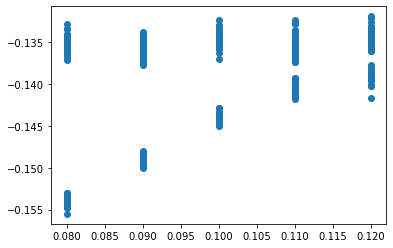

In [32]:
plt.scatter(gs_xgb.cv_results_['param_eta'], gs_xgb.cv_results_['mean_test_score'])

In [33]:
state = 0

l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []
    
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_tree_noOutliers,
                                                   hp_logsaleprice_noOutliers,
                                                   test_size=0.2,
                                                   random_state=state)

ytrain = ytrain.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

xgb = xgbst.XGBRegressor(random_state=state, eval_metric='rmse')

# maxdepth = range(2, 6)
# eta_ = np.linspace(1e-2, 1, 10)
# gamma_ = np.linspace(1e-5, 100, 30)
# subsample_ = np.linspace(0, 1, 3)

maxdepth = [3]
eta_ = [0.12]
gamma_ = [0.5]
subsample_ = np.linspace(0.54, 0.55, 20)
treemethod = ['gpu_hist']
predictor_ = ['gpu_predictor']
booster_ = ['dart']
samplingmethod = ['gradient_based']
minchildwt = np.linspace(4, 6, 10)
colsamptree = [0.8]

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
              'gamma': gamma_,
              'subsample': subsample_,
              'tree_method': treemethod,
              'predictor': predictor_,
              'sampling_method': samplingmethod,
              'booster': booster_,
              'min_child_weight': minchildwt,
              'colsample_bytree': colsamptree}

gs_xgb = ms.GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb.fit(xtrain, ytrain)

l_scores.append(gs_xgb.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_xgb, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb, ytest, xtest))
best_par_list.append(gs_xgb.best_params_)

diff_rmse = np.subtract(train_rmse, test_rmse)
    
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']

best_par_df = pd.DataFrame(best_par_list)

xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

xgb_res_df

Wall time: 4min 5s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,booster,colsample_bytree,eta,gamma,max_depth,min_child_weight,predictor,sampling_method,subsample,tree_method
0,0.918013,0.113513,0.133725,-0.020212,dart,0.8,0.12,0.5,3,5.111111,gpu_predictor,gradient_based,0.545263,gpu_hist


In [34]:
state = 0

l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []
    
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_tree_noOutliers,
                                                   hp_logsaleprice_noOutliers,
                                                   test_size=0.2,
                                                   random_state=state)

ytrain = ytrain.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

xgb = xgbst.XGBRegressor(random_state=state, eval_metric='rmse')

# maxdepth = range(2, 6)
# eta_ = np.linspace(1e-2, 1, 10)
# gamma_ = np.linspace(1e-5, 100, 30)
# subsample_ = np.linspace(0, 1, 3)

maxdepth = [3]
eta_ = [0.12]
gamma_ = [0.01]
subsample_ = np.linspace(0.54, 0.55, 20)
treemethod = ['gpu_hist']
predictor_ = ['gpu_predictor']
booster_ = ['dart']
samplingmethod = ['gradient_based']
minchildwt = np.linspace(4, 6, 10)
colsamptree = [0.8]

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
              'gamma': gamma_,
              'subsample': subsample_,
              'tree_method': treemethod,
              'predictor': predictor_,
              'sampling_method': samplingmethod,
              'booster': booster_,
              'min_child_weight': minchildwt,
              'colsample_bytree': colsamptree}

gs_xgb = ms.GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb.fit(xtrain, ytrain)

l_scores.append(gs_xgb.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_xgb, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb, ytest, xtest))
best_par_list.append(gs_xgb.best_params_)

diff_rmse = np.subtract(train_rmse, test_rmse)
    
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']

best_par_df = pd.DataFrame(best_par_list)

xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

xgb_res_df

Wall time: 5min 7s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,booster,colsample_bytree,eta,gamma,max_depth,min_child_weight,predictor,sampling_method,subsample,tree_method
0,0.955782,0.083362,0.119875,-0.036512,dart,0.8,0.12,0.01,3,4.888889,gpu_predictor,gradient_based,0.546316,gpu_hist


In [35]:
xgb = xgbst.XGBRegressor(random_state=state, eval_metric='rmse')

xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_tree_noOutliers,
                                                   hp_logsaleprice_noOutliers,
                                                   test_size=0.2,
                                                   random_state=state)

ytrain = ytrain.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

maxdepth = range(2, 6)
eta_ = np.linspace(1e-2, 1, 10)
gamma_ = np.linspace(1e-5, 100, 30)
subsample_ = np.linspace(0, 1, 3)
# updater_ = [grow_colmaker,prune,grow_gpu_hist]

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
              'gamma': gamma_,
              'subsample': subsample_}

gs_xgb = GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb.fit(xtrain, ytrain)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_xgb.best_params_)

print('where the learning rate is: ', gs_xgb.best_params_['eta'])
print('and the L1 ratio is: ', gs_xgb.best_params_['max_depth'])
print('where the alpha is: ', gs_xgb.best_params_['gamma'])
print('and the L1 ratio is: ', gs_xgb.best_params_['subsample'])

print('#'*50)
print('\n')

print('The best score is: ', gs_xgb.best_estimator_.score(xtrain, ytrain))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_xgb, ytrain, xtrain))

Wall time: 15min 52s
##################################################


Currently, the best parameters are:  {'eta': 0.23, 'gamma': 1e-05, 'max_depth': 2, 'subsample': 1.0}
where the learning rate is:  0.23
and the L1 ratio is:  2
where the alpha is:  1e-05
and the L1 ratio is:  1.0
##################################################


The best score is:  0.9516679205615829
##################################################


The RMSE is:  0.08715446048668395


In [10]:
state = 0

l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []
    
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_tree_noOutliers,
                                                   hp_logsaleprice_noOutliers,
                                                   test_size=0.2,
                                                   random_state=state)

ytrain = ytrain.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

xgb = xgbst.XGBRegressor(random_state=state, eval_metric='rmse')

maxdepth = range(2, 6)
eta_ = np.linspace(0.05, 0.2, 20)
gamma_ = [0]
subsample_ = np.linspace(0.5, 1, 10)

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
              'gamma': gamma_,
              'subsample': subsample_}

gs_xgb = ms.GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb.fit(xtrain, ytrain)

l_scores.append(gs_xgb.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_xgb, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb, ytest, xtest))
best_par_list.append(gs_xgb.best_params_)

diff_rmse = np.subtract(train_rmse, test_rmse)
    
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']

best_par_df = pd.DataFrame(best_par_list)

xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

xgb_res_df

Wall time: 4min 22s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,eta,gamma,max_depth,subsample
0,0.94727,0.091034,0.125691,-0.034657,0.2,0,2,0.555556


In [11]:
state = 0

l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []
    
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_tree_noOutliers,
                                                   hp_logsaleprice_noOutliers,
                                                   test_size=0.2,
                                                   random_state=state)

ytrain = ytrain.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

xgb = xgbst.XGBRegressor(random_state=state, eval_metric='rmse')

maxdepth = range(2, 6)
eta_ = np.linspace(0.1, 0.3, 20)
gamma_ = [0]
subsample_ = np.linspace(0.5, 1, 10)

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
              'gamma': gamma_,
              'subsample': subsample_}

gs_xgb = ms.GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb.fit(xtrain, ytrain)

l_scores.append(gs_xgb.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_xgb, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb, ytest, xtest))
best_par_list.append(gs_xgb.best_params_)

diff_rmse = np.subtract(train_rmse, test_rmse)
    
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']

best_par_df = pd.DataFrame(best_par_list)

xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

xgb_res_df

Wall time: 4min 32s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,eta,gamma,max_depth,subsample
0,0.942514,0.09505,0.125443,-0.030393,0.152632,0,2,0.555556


In [12]:
state = 0

l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []
    
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_tree_noOutliers,
                                                   hp_logsaleprice_noOutliers,
                                                   test_size=0.2,
                                                   random_state=state)

ytrain = ytrain.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

xgb = xgbst.XGBRegressor(random_state=state, eval_metric='rmse')

maxdepth = range(2, 6)
eta_ = np.linspace(0.1, 0.2, 20)
gamma_ = [0]
subsample_ = np.linspace(0.4, 0.6, 10)

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
              'gamma': gamma_,
              'subsample': subsample_}

gs_xgb = ms.GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb.fit(xtrain, ytrain)

l_scores.append(gs_xgb.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_xgb, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb, ytest, xtest))
best_par_list.append(gs_xgb.best_params_)

diff_rmse = np.subtract(train_rmse, test_rmse)
    
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']

best_par_df = pd.DataFrame(best_par_list)

xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

xgb_res_df

Wall time: 4min 25s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,eta,gamma,max_depth,subsample
0,0.964014,0.075204,0.125546,-0.050343,0.152632,0,3,0.533333


In [9]:
gs_xgb.best_estimator_.n_estimators

100

In [10]:
# The above characteristics are:
# {'eta': 0.13, 'gamma': 0.0001, 'max_depth': 4, 'subsample': 0.5}

state = 0

l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []
    
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_nonimpute,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=state)

ytrain = ytrain.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

xgb = xgbst.XGBRegressor(random_state=state, eval_metric='rmse')

maxdepth = range(2, 7)
eta_ = np.linspace(0.12, 0.18, 20)
gamma_ = [1]
subsample_ = np.linspace(0.5, 0.9, 9)

# evals=evals, early_stopping_rounds=10

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
              'gamma': gamma_,
              'subsample': subsample_}

gs_xgb = ms.GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb.fit(xtrain, ytrain)

l_scores.append(gs_xgb.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_xgb, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb, ytest, xtest))
best_par_list.append(gs_xgb.best_params_)

diff_rmse = np.subtract(train_rmse, test_rmse)
    
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']

best_par_df = pd.DataFrame(best_par_list)

xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

xgb_res_df

Wall time: 6min 33s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,eta,gamma,max_depth,subsample
0,0.884618,0.136491,0.151267,-0.014776,0.161053,1,3,0.7


In [12]:
state = 0

l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []
    
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_nonimpute,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=state)

ytrain = ytrain.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

xgb = xgbst.XGBRegressor(random_state=state, eval_metric='rmse')

maxdepth = range(2, 6)
eta_ = np.linspace(0.12, 0.16, 9)
gamma_ = np.linspace(1e-2, 0.5, 9)
subsample_ = np.linspace(0.6, 0.9, 9)

# evals=evals, early_stopping_rounds=10

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
              'gamma': gamma_,
              'subsample': subsample_}

gs_xgb = ms.GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb.fit(xtrain, ytrain)

l_scores.append(gs_xgb.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_xgb, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb, ytest, xtest))
best_par_list.append(gs_xgb.best_params_)

diff_rmse = np.subtract(train_rmse, test_rmse)
    
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']

best_par_df = pd.DataFrame(best_par_list)

xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

xgb_res_df

Wall time: 18min 56s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,eta,gamma,max_depth,subsample
0,0.978977,0.058262,0.134632,-0.076371,0.125,0.01,4,0.7875


In [13]:
state = 0

l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []
    
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_nonimpute,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=state)

ytrain = ytrain.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

xgb = xgbst.XGBRegressor(random_state=state, eval_metric='rmse')

maxdepth = range(2, 6)
eta_ = np.linspace(0.11, 0.14, 9)
gamma_ = np.linspace(1e-1, 1, 9)
subsample_ = np.linspace(0.65, 0.9, 9)

# evals=evals, early_stopping_rounds=10

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
              'gamma': gamma_,
              'subsample': subsample_}

gs_xgb = ms.GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb.fit(xtrain, ytrain)

l_scores.append(gs_xgb.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_xgb, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb, ytest, xtest))
best_par_list.append(gs_xgb.best_params_)

diff_rmse = np.subtract(train_rmse, test_rmse)
    
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']

best_par_df = pd.DataFrame(best_par_list)

xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

xgb_res_df

Wall time: 20min 21s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,eta,gamma,max_depth,subsample
0,0.955152,0.085096,0.138688,-0.053592,0.1325,0.1,4,0.65


In [14]:
state = 0

l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []
    
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_nonimpute,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=state)

ytrain = ytrain.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

xgb = xgbst.XGBRegressor(random_state=state, eval_metric='rmse')

maxdepth = range(2, 6)
eta_ = np.linspace(0.11, 0.14, 9)
# gamma_ = np.linspace(1e-1, 1, 9)
subsample_ = np.linspace(0.65, 0.9, 9)

# evals=evals, early_stopping_rounds=10

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
#               'gamma': gamma_,
              'subsample': subsample_}

gs_xgb = ms.GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb.fit(xtrain, ytrain)

l_scores.append(gs_xgb.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_xgb, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb, ytest, xtest))
best_par_list.append(gs_xgb.best_params_)

diff_rmse = np.subtract(train_rmse, test_rmse)
    
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']

best_par_df = pd.DataFrame(best_par_list)

xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

xgb_res_df

Wall time: 1min 55s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,eta,max_depth,subsample
0,0.961065,0.079288,0.137482,-0.058194,0.11375,3,0.9


In [ ]:
state = 0

l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []
    
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_nonimpute,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=state)

ytrain = ytrain.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

xgb = xgbst.XGBRegressor(random_state=state, eval_metric='rmse')

maxdepth = range(2, 6)
eta_ = np.linspace(0.11, 0.14, 9)
# gamma_ = np.linspace(1e-1, 1, 9)
subsample_ = np.linspace(0.65, 0.9, 9)

# evals=evals, early_stopping_rounds=10

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
#               'gamma': gamma_,
              'subsample': subsample_}

gs_xgb = ms.GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb.fit(xtrain, ytrain)

l_scores.append(gs_xgb.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_xgb, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb, ytest, xtest))
best_par_list.append(gs_xgb.best_params_)

diff_rmse = np.subtract(train_rmse, test_rmse)
    
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']

best_par_df = pd.DataFrame(best_par_list)

xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

xgb_res_df

In [ ]:
plt.scatter(gs_xgb.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_xgb.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

In [15]:
lowest_testrmse = xgb_res_df[xgb_res_df.TestRMSE==xgb_res_df.TestRMSE.min()]
lowest_testrmse

,Scores,TrainRMSE,TestRMSE,DiffRMSE,eta,gamma,max_depth,subsample
18,0.972053,0.06724,0.10722,-0.039979,0.14,0.00005,4,0.45


In [22]:
# The above characteristics are:
# {'eta': 0.13, 'gamma': 0.0001, 'max_depth': 4, 'subsample': 0.5}



import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

randomstate = list(range(0, 21))

counter = 0

c_list = []
l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

for state in randomstate:
    

    xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_nonimpute,
                                                       hp_logsaleprice,
                                                       test_size=0.2,
                                                       random_state=state)

    ytrain = ytrain.values.flatten()
    
    xgb = XGBRegressor(random_state=state, eval_method='rmse')
    
    n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)
    
    maxdepth = [3, 4, 5]
    eta_ = (0.139, 0.14, 0.141)
    gamma_ = [0.00003, 0.00004, 0.000045]
    subsample_ = [0.44, 0.45, 0.46]


    gparam_xgb = {'max_depth': maxdepth,
                  'eta': eta_,
                  'gamma': gamma_,
                  'subsample': subsample_}

    gs_xgb = ms.GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                          scoring='neg_root_mean_squared_error', return_train_score=True)
    
    gs_xgb.fit(xtrain, ytrain)
    
    c_list.append(counter)
    l_scores.append(gs_xgb.best_estimator_.score(xtrain, ytrain))
    train_rmse.append(rmse(gs_xgb, ytrain, xtrain))
    test_rmse.append(rmse(gs_xgb, ytest, xtest))
    best_par_list.append(gs_xgb.best_params_)
    
    counter+=1

diff_rmse = np.subtract(train_rmse, test_rmse)

c_list = list(map(int, c_list))
    
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
xgb_res_df.index = c_list

best_par_df = pd.DataFrame(best_par_list)

xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

print(current_time)

xgb_res_df

09:19:48
[09:20:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { eval_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:21:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { eval_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:21:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { eval_method } might not be used.

  This may not be accurate due to some parameters are only used

,Scores,TrainRMSE,TestRMSE,DiffRMSE,eta,gamma,max_depth,subsample
0,0.960583,0.079777,0.139362,-0.059584,0.141,0.000030,3,0.44
1,0.973991,0.063589,0.140721,-0.077132,0.140,0.000045,4,0.45
2,0.973230,0.064862,0.135140,-0.070279,0.141,0.000030,4,0.44
3,0.983519,0.052425,0.126711,-0.074286,0.140,0.000045,5,0.44
4,0.972219,0.067380,0.118663,-0.051283,0.140,0.000045,4,0.45
5,0.954612,0.084473,0.128049,-0.043576,0.140,0.000030,3,0.45
6,0.983763,0.050509,0.147159,-0.096650,0.141,0.000030,5,0.44
7,0.983538,0.050892,0.127963,-0.077071,0.141,0.000040,5,0.45
8,0.972539,0.066938,0.135305,-0.068367,0.140,0.000030,4,0.46
9,0.955898,0.084449,0.106838,-0.022390,0.141,0.000030,3,0.45


In [23]:
lowest_testrmse = xgb_res_df[xgb_res_df.TestRMSE==xgb_res_df.TestRMSE.min()]
lowest_testrmse

,Scores,TrainRMSE,TestRMSE,DiffRMSE,eta,gamma,max_depth,subsample
9,0.955898,0.084449,0.106838,-0.02239,0.141,0.00003,3,0.45


In [24]:
# The above characteristics are:
# {'eta': 0.13, 'gamma': 0.0001, 'max_depth': 4, 'subsample': 0.5}



import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

randomstate = list(range(0, 21))

counter = 0

c_list = []
l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

for state in randomstate:
    

    xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_nonimpute,
                                                       hp_logsaleprice,
                                                       test_size=0.2,
                                                       random_state=state)

    ytrain = ytrain.values.flatten()
    
    xgb = XGBRegressor(random_state=state, eval_method='rmse')
    
    n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)
    
    maxdepth = [2, 3, 4, 5]
    eta_ = (0.139, 0.14, 0.141, 0.142, 0.143)
    gamma_ = [0.00002, 0.00003, 0.00004, 0.000045]
    subsample_ = [0.43, 0.44, 0.45, 0.46] # use larger differences in the range


    gparam_xgb = {'max_depth': maxdepth,
                  'eta': eta_,
                  'gamma': gamma_,
                  'subsample': subsample_}

    gs_xgb = ms.GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                          scoring='neg_root_mean_squared_error', return_train_score=True)
    
    gs_xgb.fit(xtrain, ytrain)
    
    c_list.append(counter)
    l_scores.append(gs_xgb.best_estimator_.score(xtrain, ytrain))
    train_rmse.append(rmse(gs_xgb, ytrain, xtrain))
    test_rmse.append(rmse(gs_xgb, ytest, xtest))
    best_par_list.append(gs_xgb.best_params_)
    
    counter+=1

diff_rmse = np.subtract(train_rmse, test_rmse)

c_list = list(map(int, c_list))
    
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
xgb_res_df.index = c_list

best_par_df = pd.DataFrame(best_par_list)

xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

print(current_time)

xgb_res_df

09:40:50
[09:43:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { eval_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:45:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { eval_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:47:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { eval_method } might not be used.

  This may not be accurate due to some parameters are only used

,Scores,TrainRMSE,TestRMSE,DiffRMSE,eta,gamma,max_depth,subsample
0,0.960583,0.079777,0.139362,-0.059584,0.141,0.000020,3,0.44
1,0.973991,0.063589,0.140721,-0.077132,0.140,0.000045,4,0.45
2,0.958725,0.080540,0.133158,-0.052618,0.142,0.000020,3,0.46
3,0.935586,0.103642,0.121174,-0.017532,0.140,0.000020,2,0.45
4,0.954736,0.086006,0.123490,-0.037483,0.141,0.000020,3,0.43
5,0.970606,0.067980,0.125240,-0.057259,0.140,0.000045,4,0.43
6,0.972525,0.065703,0.138295,-0.072592,0.142,0.000020,4,0.46
7,0.983538,0.050892,0.127963,-0.077071,0.141,0.000040,5,0.45
8,0.972539,0.066938,0.135305,-0.068367,0.140,0.000030,4,0.46
9,0.955247,0.085070,0.104156,-0.019086,0.143,0.000020,3,0.46


In [26]:
lowest_testrmse = xgb_res_df[xgb_res_df.TestRMSE==xgb_res_df.TestRMSE.min()]
lowest_testrmse

,Scores,TrainRMSE,TestRMSE,DiffRMSE,eta,gamma,max_depth,subsample
9,0.955247,0.08507,0.104156,-0.019086,0.143,0.00002,3,0.46


In [27]:
# The above characteristics are:
# {'eta': 0.13, 'gamma': 0.0001, 'max_depth': 4, 'subsample': 0.5}

import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

randomstate = list(range(0, 21))

counter = 0

c_list = []
l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

for state in randomstate:
    

    xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_nonimpute,
                                                       hp_logsaleprice,
                                                       test_size=0.2,
                                                       random_state=state)

    ytrain = ytrain.values.flatten()
    
    xgb = XGBRegressor(random_state=state, eval_metric='rmse')
    
    n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)
    
    maxdepth = [2, 3, 4, 5]
    eta_ = ( 0.141, 0.142, 0.143, 0.144, 0.145)
    gamma_ = [0.000009, 0.00001, 0.00002, 0.00003, 0.00004]
    subsample_ = [0.44, 0.45, 0.46, 0.47, 0.48]


    gparam_xgb = {'max_depth': maxdepth,
                  'eta': eta_,
                  'gamma': gamma_,
                  'subsample': subsample_}

    gs_xgb = ms.GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                          scoring='neg_root_mean_squared_error', return_train_score=True)
    
    gs_xgb.fit(xtrain, ytrain)
    
    c_list.append(counter)
    l_scores.append(gs_xgb.best_estimator_.score(xtrain, ytrain))
    train_rmse.append(rmse(gs_xgb, ytrain, xtrain))
    test_rmse.append(rmse(gs_xgb, ytest, xtest))
    best_par_list.append(gs_xgb.best_params_)
    
    counter+=1

diff_rmse = np.subtract(train_rmse, test_rmse)

c_list = list(map(int, c_list))
    
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
xgb_res_df.index = c_list

best_par_df = pd.DataFrame(best_par_list)

xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

print(current_time)

xgb_res_df

11:14:09
[11:17:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { eval_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:20:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { eval_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:22:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { eval_method } might not be used.

  This may not be accurate due to some parameters are only used

,Scores,TrainRMSE,TestRMSE,DiffRMSE,eta,gamma,max_depth,subsample
0,0.963254,0.077026,0.135035,-0.058009,0.142,0.000030,3,0.48
1,0.973839,0.063775,0.145963,-0.082188,0.141,0.000009,4,0.45
2,0.984374,0.049555,0.131885,-0.082331,0.141,0.000040,5,0.47
3,0.975306,0.064171,0.126402,-0.062231,0.143,0.000030,4,0.47
4,0.973826,0.065402,0.125679,-0.060277,0.144,0.000040,4,0.47
5,0.975160,0.062492,0.124848,-0.062356,0.145,0.000020,4,0.47
6,0.972525,0.065703,0.138295,-0.072592,0.142,0.000020,4,0.46
7,0.983538,0.050892,0.127963,-0.077071,0.141,0.000040,5,0.45
8,0.957755,0.083024,0.137721,-0.054696,0.142,0.000009,3,0.46
9,0.955247,0.085070,0.104156,-0.019086,0.143,0.000009,3,0.46


In [28]:
lowest_testrmse = xgb_res_df[xgb_res_df.TestRMSE==xgb_res_df.TestRMSE.min()]
lowest_testrmse

,Scores,TrainRMSE,TestRMSE,DiffRMSE,eta,gamma,max_depth,subsample
9,0.955247,0.08507,0.104156,-0.019086,0.143,0.000009,3,0.46


# After Removing Outliers

In [30]:
# The above characteristics are:
# {'eta': 0.13, 'gamma': 0.0001, 'max_depth': 4, 'subsample': 0.5}

import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

randomstate = list(range(0, 21))

counter = 0

c_list = []
l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

for state in randomstate:
    
    
    xtrain_gb_out, xtest_gb_out, ytrain_gb_out, ytest_gb_out = ms.train_test_split(hp_tree_noOutliers, 
                                                                                   hp_logsaleprice_noOutliers,
                                                                                   test_size=0.2,
                                                                                   random_state=state)

    ytrain_gb_out = ytrain_gb_out.values.flatten()
    
    xgb = XGBRegressor(random_state=state, eval_method='rmse')
    
    n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)
    
    maxdepth = [2, 3, 4, 5]
    eta_ = ( 0.141, 0.142, 0.143, 0.144, 0.145)
    gamma_ = [0.000009, 0.00001, 0.00002, 0.00003, 0.00004]
    subsample_ = [0.44, 0.45, 0.46, 0.47, 0.48]


    gparam_xgb = {'max_depth': maxdepth,
                  'eta': eta_,
                  'gamma': gamma_,
                  'subsample': subsample_}

    gs_xgb = ms.GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                          scoring='neg_root_mean_squared_error', return_train_score=True)
    
    gs_xgb.fit(xtrain_gb_out, ytrain_gb_out)
    
    c_list.append(counter)
    l_scores.append(gs_xgb.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))
    train_rmse.append(rmse(gs_xgb, ytrain_gb_out, xtrain_gb_out))
    test_rmse.append(rmse(gs_xgb, ytest_gb_out, xtest_gb_out))
    best_par_list.append(gs_xgb.best_params_)
    
    counter+=1

diff_rmse = np.subtract(train_rmse, test_rmse)

c_list = list(map(int, c_list))
    
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
xgb_res_df.index = c_list

best_par_df = pd.DataFrame(best_par_list)

xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

print(current_time)

xgb_res_df 

14:07:32
[14:10:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { eval_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:13:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { eval_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:18:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { eval_method } might not be used.

  This may not be accurate due to some parameters are only used

,Scores,TrainRMSE,TestRMSE,DiffRMSE,eta,gamma,max_depth,subsample
0,0.940380,0.096799,0.125671,-0.028872,0.145,0.000009,2,0.48
1,0.959704,0.079136,0.128594,-0.049459,0.145,0.000009,3,0.45
2,0.974715,0.062818,0.124414,-0.061597,0.142,0.000009,4,0.48
3,0.940794,0.098425,0.117985,-0.019561,0.141,0.000009,2,0.44
4,0.962120,0.077991,0.123130,-0.045139,0.144,0.000009,3,0.47
5,0.965291,0.074909,0.136396,-0.061486,0.144,0.000009,3,0.48
6,0.937924,0.097852,0.120042,-0.022189,0.141,0.000009,2,0.46
7,0.975810,0.061601,0.135599,-0.073998,0.145,0.000020,4,0.45
8,0.959853,0.081374,0.117357,-0.035983,0.143,0.000009,3,0.45
9,0.960989,0.078133,0.122782,-0.044649,0.144,0.000009,3,0.48


In [31]:
lowest_testrmse = xgb_res_df[xgb_res_df.TestRMSE==xgb_res_df.TestRMSE.min()]
lowest_testrmse

,Scores,TrainRMSE,TestRMSE,DiffRMSE,eta,gamma,max_depth,subsample
20,0.937904,0.098587,0.116041,-0.017454,0.142,0.000009,2,0.47


In [32]:
# The above characteristics are:
# {'eta': 0.13, 'gamma': 0.0001, 'max_depth': 4, 'subsample': 0.5}

import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

randomstate = list(range(0, 21))

counter = 0

c_list = []
l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

for state in randomstate:
    
    
    xtrain_gb_out, xtest_gb_out, ytrain_gb_out, ytest_gb_out = ms.train_test_split(hp_tree_noOutliers, 
                                                                                   hp_logsaleprice_noOutliers,
                                                                                   test_size=0.2,
                                                                                   random_state=state)

    ytrain_gb_out = ytrain_gb_out.values.flatten()
    
    xgb = XGBRegressor(random_state=state, eval_method='rmse')
    
    n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)
    
    maxdepth = [1, 2, 3, 4]
    eta_ = (0.141, 0.1415, 0.142, 0.1425, 0.143)
    gamma_ = [0.000006, 0.000007, 0.000008, 0.000009, 0.00001]
    subsample_ = [0.465, 0.47, 0.475, 0.48]


    gparam_xgb = {'max_depth': maxdepth,
                  'eta': eta_,
                  'gamma': gamma_,
                  'subsample': subsample_}

    gs_xgb = ms.GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                          scoring='neg_root_mean_squared_error', return_train_score=True)
    
    gs_xgb.fit(xtrain_gb_out, ytrain_gb_out)
    
    c_list.append(counter)
    l_scores.append(gs_xgb.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))
    train_rmse.append(rmse(gs_xgb, ytrain_gb_out, xtrain_gb_out))
    test_rmse.append(rmse(gs_xgb, ytest_gb_out, xtest_gb_out))
    best_par_list.append(gs_xgb.best_params_)
    
    counter+=1

diff_rmse = np.subtract(train_rmse, test_rmse)

c_list = list(map(int, c_list))
    
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
xgb_res_df.index = c_list

best_par_df = pd.DataFrame(best_par_list)

xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

print(current_time)

xgb_res_df 

16:14:11
[16:16:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { eval_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:18:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { eval_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:20:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { eval_method } might not be used.

  This may not be accurate due to some parameters are only used

,Scores,TrainRMSE,TestRMSE,DiffRMSE,eta,gamma,max_depth,subsample
0,0.960063,0.079224,0.130279,-0.051054,0.1430,0.000006,3,0.465
1,0.957954,0.080835,0.125234,-0.044399,0.1425,0.000007,3,0.465
2,0.974715,0.062818,0.124414,-0.061597,0.1420,0.000006,4,0.480
3,0.958968,0.081937,0.116829,-0.034891,0.1420,0.000006,3,0.480
4,0.975204,0.063100,0.125993,-0.062894,0.1425,0.000006,4,0.470
5,0.943573,0.095512,0.145727,-0.050215,0.1425,0.000006,2,0.465
6,0.938486,0.097409,0.122570,-0.025161,0.1415,0.000006,2,0.465
7,0.961685,0.077527,0.133875,-0.056347,0.1415,0.000006,3,0.480
8,0.958867,0.082367,0.116152,-0.033785,0.1430,0.000006,3,0.475
9,0.974437,0.063249,0.122386,-0.059137,0.1425,0.000006,4,0.475


In [33]:
lowest_testrmse = xgb_res_df[xgb_res_df.TestRMSE==xgb_res_df.TestRMSE.min()]
lowest_testrmse

,Scores,TrainRMSE,TestRMSE,DiffRMSE,eta,gamma,max_depth,subsample
16,0.958227,0.08065,0.115014,-0.034365,0.143,0.000006,3,0.47


In [35]:
# The above characteristics are:
# {'eta': 0.13, 'gamma': 0.0001, 'max_depth': 4, 'subsample': 0.5}

import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

randomstate = list(range(0, 21))

counter = 0

c_list = []
l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

for state in randomstate:
    
    
    xtrain_gb_out, xtest_gb_out, ytrain_gb_out, ytest_gb_out = ms.train_test_split(hp_tree_noOutliers, 
                                                                                   hp_logsaleprice_noOutliers,
                                                                                   test_size=0.2,
                                                                                   random_state=state)

    ytrain_gb_out = ytrain_gb_out.values.flatten()
    
    xgb = XGBRegressor(random_state=state, eval_method='rmse')
    
    n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)
    
    maxdepth = [2, 3, 4]
    eta_ = (0.142, 0.1425, 0.143, 0.144, 0.145, 0.15)
    gamma_ = [1e-7, 5e-7, 1e-6, 0.000004, 0.000005, 0.000006, 0.000007]
    subsample_ = [0.469, 0.47, 0.471]


    gparam_xgb = {'max_depth': maxdepth,
                  'eta': eta_,
                  'gamma': gamma_,
                  'subsample': subsample_}

    gs_xgb = ms.GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                          scoring='neg_root_mean_squared_error', return_train_score=True)
    
    gs_xgb.fit(xtrain_gb_out, ytrain_gb_out)
    
    c_list.append(counter)
    l_scores.append(gs_xgb.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))
    train_rmse.append(rmse(gs_xgb, ytrain_gb_out, xtrain_gb_out))
    test_rmse.append(rmse(gs_xgb, ytest_gb_out, xtest_gb_out))
    best_par_list.append(gs_xgb.best_params_)
    
    counter+=1

diff_rmse = np.subtract(train_rmse, test_rmse)

c_list = list(map(int, c_list))
    
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
xgb_res_df.index = c_list

best_par_df = pd.DataFrame(best_par_list)

xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)

print(current_time)

xgb_res_df 

17:03:14
[17:05:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { eval_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:07:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { eval_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:09:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { eval_method } might not be used.

  This may not be accurate due to some parameters are only used

,Scores,TrainRMSE,TestRMSE,DiffRMSE,eta,gamma,max_depth,subsample
0,0.940542,0.096667,0.131031,-0.034364,0.1420,1.000000e-07,2,0.471
1,0.973622,0.064027,0.127201,-0.063173,0.1420,1.000000e-07,4,0.470
2,0.941453,0.095587,0.129316,-0.033729,0.1425,1.000000e-07,2,0.471
3,0.960674,0.080216,0.110393,-0.030177,0.1420,1.000000e-07,3,0.469
4,0.975204,0.063100,0.125993,-0.062894,0.1425,1.000000e-07,4,0.470
5,0.946099,0.093350,0.143805,-0.050455,0.1450,1.000000e-07,2,0.471
6,0.939947,0.096245,0.118367,-0.022122,0.1500,1.000000e-07,2,0.471
7,0.963931,0.075221,0.132865,-0.057645,0.1440,1.000000e-07,3,0.471
8,0.959909,0.081317,0.116117,-0.034800,0.1425,1.000000e-07,3,0.469
9,0.959684,0.079430,0.121699,-0.042269,0.1450,1.000000e-07,3,0.470


In [ ]:
lowest_testrmse = xgb_res_df[xgb_res_df.TestRMSE==xgb_res_df.TestRMSE.min()]
lowest_testrmse

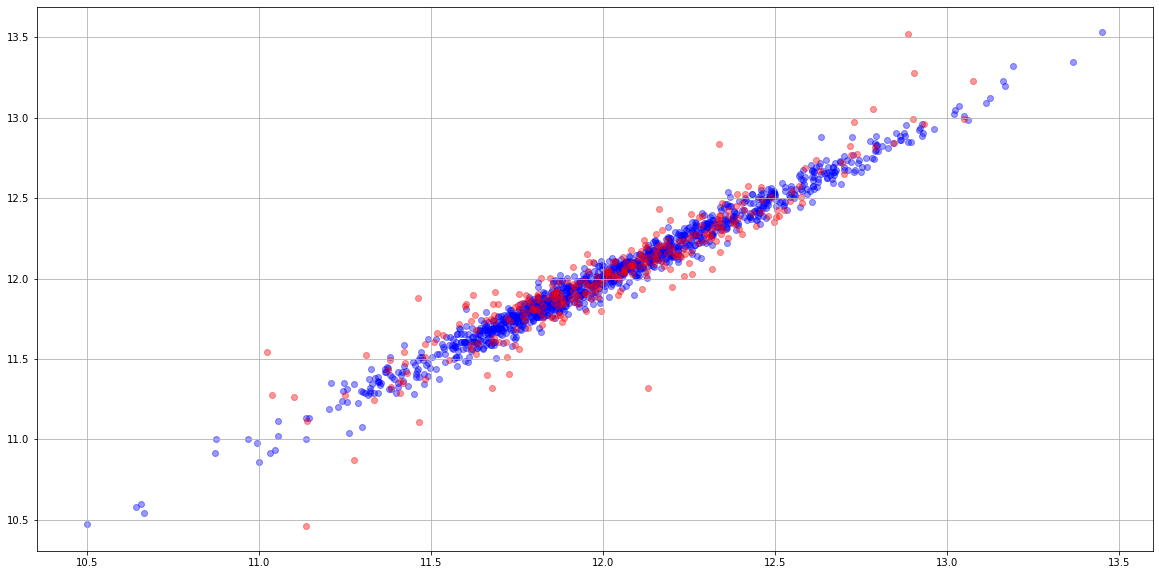

In [25]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_xgb.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_xgb.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

## Based on the above, we will assume that our parameters are reasonable and will vary the random_state

In [ ]:
randomstate = list(range(0, 5))

counter = 0

c_list = []
l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

for state in randomstate:
    
    xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_linear_fullyimputed,
                                                       hp_logsaleprice,
                                                       test_size=0.2,
                                                       random_state=state)
    ytrain = ytrain.values.flatten()
    
    xgb = XGBRegressor(random_state=state, eval_method='rmse', tree_method='gpu_hist')

    maxdepth = range(2, 6)
    eta_ = np.linspace(1e-2, 1, 10)
    gamma_ = np.linspace(1e-5, 100, 30)
    subsample_ = np.linspace(0, 1, 3)
    # updater_ = [grow_colmaker,prune,grow_gpu_hist]

    n_folds=ms.KFold(n_splits=5, random_state=state, shuffle=True)

    gparam_xgb = {'max_depth': maxdepth,
                  'eta': eta_,
                  'gamma': gamma_,
                  'subsample': subsample_}


    gs_lasso = ms.GridSearchCV(lasso, gparam_lasso, cv=n_folds, refit=True, n_jobs=-1,
                          scoring='neg_root_mean_squared_error', return_train_score=True)
    
    gs_lasso.fit(xtrain, ytrain)
    
    c_list.append(counter)
    l_scores.append(gs_lasso.best_estimator_.score(xtrain, ytrain))
    train_rmse.append(rmse(gs_lasso, ytrain, xtrain))
    test_rmse.append(rmse(gs_lasso, ytest, xtest))
    best_par_list.append(gs_lasso.best_params_)
    
    counter+=1

diff_rmse = np.subtract(train_rmse, test_rmse)

c_list = list(map(int, c_list))
    
lasso_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
lasso_res_df = pd.DataFrame(lasso_list_results).T
lasso_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
lasso_res_df.index = c_list

best_par_df = pd.DataFrame(best_par_list)

lasso_res_df = pd.concat([lasso_res_df, best_par_df], axis=1, sort=False)

lasso_res_df

## XGBoost

In [ ]:
xgb = XGBRegressor(random_state=0, eval_method='rmse', tree_method='gpu_hist')

In [ ]:
maxdepth = range(2, 6)
eta_ = np.linspace(1e-2, 1, 10)
gamma_ = np.linspace(1e-5, 100, 30)
subsample_ = np.linspace(0, 1, 3)
# updater_ = [grow_colmaker,prune,grow_gpu_hist]

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
              'gamma': gamma_,
              'subsample': subsample_}

gs_xgb = GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb.fit(xtrain_gb, ytrain_gb)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_xgb.best_params_)

print('where the learning rate is: ', gs_xgb.best_params_['eta'])
print('and the L1 ratio is: ', gs_xgb.best_params_['max_depth'])
print('where the alpha is: ', gs_xgb.best_params_['gamma'])
print('and the L1 ratio is: ', gs_xgb.best_params_['subsample'])

print('#'*50)
print('\n')

print('The best score is: ', gs_xgb.best_estimator_.score(xtrain_gb, ytrain_gb))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_xgb, ytrain_gb, xtrain_gb))

In [ ]:
gs_xgb.cv_results_

In [ ]:
print('The test set RMSE is: ', rmse(gs_xgb, ytest_gb, xtest_gb))

plt.figure(figsize=(20, 10))
plt.scatter(gs_xgb.best_estimator_.predict(xtrain_gb), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_xgb.best_estimator_.predict(xtest_gb), ytest, color='red', alpha=0.4)

## Run with Lasso Prediction

In [ ]:
maxdepth = range(2, 6)
eta_ = np.linspace(1e-2, 1, 10)
gamma_ = np.linspace(1e-5, 100, 30)
subsample_ = np.linspace(0, 1, 3)
# updater_ = [grow_colmaker,prune,grow_gpu_hist]

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
              'gamma': gamma_,
              'subsample': subsample_}

gs_xgb = GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb.fit(xtrain_gb_out, lasso_trained_label)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_xgb.best_params_)

print('where the learning rate is: ', gs_xgb.best_params_['eta'])
print('and the L1 ratio is: ', gs_xgb.best_params_['max_depth'])
print('where the alpha is: ', gs_xgb.best_params_['gamma'])
print('and the L1 ratio is: ', gs_xgb.best_params_['subsample'])

print('#'*50)
print('\n')

print('The best score is: ', gs_xgb.best_estimator_.score(xtrain_gb_out, lasso_trained_label))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_xgb, lasso_trained_label, xtrain_gb_out))

In [ ]:
print('The test set RMSE is: ', rmse(gs_xgb, ytest_gb, xtest_gb))

plt.figure(figsize=(20, 10))
plt.scatter(gs_xgb.best_estimator_.predict(xtrain_gb), lasso_trained_label, color='blue', alpha=0.4)
plt.scatter(gs_xgb.best_estimator_.predict(xtest_gb), ytest, color='red', alpha=0.4

In [ ]:
### Due to the low RMSE, we will attempt XGBoost with 

In [ ]:
hp_nonimpute = pd.read_csv('../hp_nonimpute.csv')
hp_nonimpute

In [ ]:
xtrain_nonimpute, xtest_nonimpute, ytrain_nonimpute, ytest_nonimpute = ms.train_test_split(hp_tree_fullyimputed, 
                                                                                           hp_logsaleprice, 
                                                                                           test_size=0.2, 
                                                                                           random_state=0)

ytrain_nonimpute = ytrain_nonimpute.values.flatten()

In [ ]:
xgb = XGBRegressor(random_state=0)

xgb.fit(xtrain_nonimpute, ytrain_nonimpute)

In [ ]:
maxdepth = range(2, 6)
eta_ = np.linspace(1e-2, 1, 10)
gamma_ = np.linspace(1e-5, 100, 30)
subsample_ = np.linspace(0, 1, 3)
# updater_ = [grow_colmaker,prune,grow_gpu_hist]

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
              'gamma': gamma_,
              'subsample': subsample_}

gs_xgb = GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

print(gs_xgb.fit(xtrain_gb, ytrain_gb))

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_xgb.best_params_)

print('where the learning rate is: ', gs_xgb.best_params_['eta'])
print('and the L1 ratio is: ', gs_xgb.best_params_['max_depth'])
print('where the alpha is: ', gs_xgb.best_params_['gamma'])
print('and the L1 ratio is: ', gs_xgb.best_params_['subsample'])

print('#'*50)
print('\n')

print('The best score is: ', gs_xgb.best_estimator_.score(xtrain_gb, ytrain_gb))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_xgb, ytrain_gb, xtrain_gb))